# Supervised classification


In [5]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In the data.csv there are letters (uppercases and lowercases) and numbers in a row format, in the cell below load the **data_all.csv** and explore it.


In [7]:
# Your code here
df = pd.read_csv('/content/drive/MyDrive/Ironhack/Laboratorios/03 Módulo 3/lab-supervised-classification/data_all.zip')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df.head()
df.describe()
df.columns

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)


Now than you had identified your data, try to define your X and y (target) for next classification models.

In [8]:
# Your code here
X = df.drop(['e'], axis = 1)
y = df.e

Before applying any model, you need to know which labels are which, to solve this you need to reshape your X-dataset into 28x28 pixels in a variable called `x_images`. <br> **Hint:** You can use *np.reshape(size of data, 28, 28))*

In [9]:
# Your code here
# Cada fila de df es una imagen, se tiene que cambiar la forma para crear una minimatriz por imagen/fila 
# X_images = X.reshape(X.shape[0], 28, 28)

# Sacamos los valos que nos interesan 
x_num = X.values # datos en lista de listas
x_image = x_num.reshape(x_num.shape[0], 28, 28) # a la lista de valores le agregas reshape, se agrega número total de registros [0], de 28 x 28

In this way, you need to visualize some data to realize which number-labels represents a letter or a number.
<br> **Hint:** You can use *plt.imshow()*

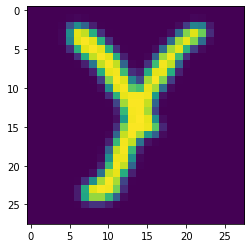

In [51]:
# Your code here
x_image[0]

plt.imshow(x_image[20])

for imagen in x_image:
  plt.imshow(imagen)
  break

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [13]:
# Función para modelos
# Your code here
def obtiene_gs (clasificador, X_train, y_train):
  tree_param = {'criterion':['gini','entropy'],'max_depth':[3],'random_state':[42]} #max_depth pequeña para acelarar el proceso
  gs = GridSearchCV(clasificador, tree_param)
  gs.fit(X_train, y_train)
  return gs.best_params_

def clasificador (X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  # Árbol 
  gs = obtiene_gs(DecisionTreeClassifier(), X_train, y_train)
  arbol = DecisionTreeClassifier(criterion= gs['criterion'], max_depth=gs['max_depth'], random_state=42) #parametros tree_para,
  arbol.fit(X_train, y_train)
  arbol.score(X_test, y_test)
  print(f'Tree score: {arbol.score(X_test, y_test)}')

  # Randome Forest
  gs = obtiene_gs(RandomForestClassifier(), X_train, y_train)
  bosque = DecisionTreeClassifier(criterion= gs['criterion'], max_depth=gs['max_depth'], random_state=42) #parametros tree_para,
  bosque.fit(X_train, y_train)
  bosque.score(X_test, y_test)
  print(f'Forest score: {bosque.score(X_test, y_test)}')

  # SVM
  sv = svm.SVC(kernel='poly')
  sv.fit(X_train, y_train)
  print(f'SVM poly score: {sv.score(X_test, y_test)}')


In [54]:
# Your code here
y.unique()
y.unique().min() # 0
y.unique().max() #61 

# 10-36: mayúsculas
# 0-9: números 
# 37-61: minúsculas 
plt.imshow(x_image[])

61.0

In [14]:
upper = df[(df['e'] >= 10) & (df['e'] <36)]
X = upper.drop(['e'], axis = 1)
y = upper['e']

clasificador(X, y)

Tree score: 0.38427181368639335
Forest score: 0.36225873345031107
SVM poly score: 0.917690221725953


* Try to do the same thing with lowercases.

In [15]:
lower = df[(df['e'] >= 36)]
X = lower.drop(['e'], axis = 1)
y = lower['e']

clasificador(X, y)

Tree score: 0.45436067997043605
Forest score: 0.45436067997043605
SVM poly score: 0.8891352549889135


* Try to do the same thing with numbers.

In [ ]:
# Your code here
numbers = df[(df['e'] >= 0) & (df['e'] < 10)]
X = numbers.drop(['e'], axis = 1)
y = numbers['e']

clasificador(X, y)